<a href="https://colab.research.google.com/github/martell-n-tardy/Risk-Prediction-Models-for-Type-2-Diabetes/blob/main/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling: BRFSS Data - By Martell Tardy, M.S.**

To clean the data I created a script to clean the bulk of the data set. This script is titled, **"???"** and is located **here** in this project's repository. The script reads in the entire data set for a year, grabs the variables of interest, replace the codes with meaningful data, and saves it in a standardized format as a .csv. The notebooks for each year are within the cleaning_code folder. Since this was a complicated and arduous process, I have detailed my methods for cleaning up an example year (2015) in this jupyter notebook.

# Getting started

Let's start by importing our libraries. We'll be using pandas, numpy, and matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading in the data

The 2015 BRFSS data is stored within my Google Drive. Therefore, I will mount my Drive to Collab and receive access to the .csv files converted from .xpt for this project. Note, all necessary encoding (UTF-8) has already occurred within the conversion script step.

In [ ]:
#mount Drive and grant access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read in data and save as variable df
df = pd.read_csv('/content/drive/MyDrive/SPRINGBOARD/CAPSTONE 3/BRFSS Data/Raw/BRFSS_2015.csv')

Let's take a quick look at what we have here. As you can see, this is a rather large data set.

In [ ]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,...,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,1292015,1,29,2015,1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,1202015,1,20,2015,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,1.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,88.0,88.0,NaN,2.0,1.0,1.0,4.0,3.0,NaN,1.0,4.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,2876.0,493.0,1.0,5.397605e-79,60.0,60.0,2800.0,2800.0,168.0,5.397605e-79,5.397605e-79,5.397605e-79,168.0,5.397605e-79,168.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,2012015,2,1,2015,1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,15.0,88.0,88.0,1.0,2.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,7.0,...,1.0,1.000000e+00,1.000000e+00,9.0,NaN,NaN,2173.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,1142015,1,14,2015,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,30.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,1142015,1,14,2015,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,20.0,88.0,30.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,2.0,2.0,...,1.0,1.000000e+00,5.397605e-79,2.0,NaN,NaN,2543.0,436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,11.0,12162015,12,16,2015,1100.0,2.015005e+09,2.015005e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,4.0,4.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2136.0,366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0
441452,72.0,11.0,12142015,12,14,2015,1100.0,2.015005e+09,2.015005e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,1.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,3727.0,639.0,1.0,5.397605e-79,30.0,NaN,5000.0,NaN,150.0,5.397605e-79,5.397605e-79,5.397605e-79,150.0,5.397605e-79,150.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
441453,72.0,11.0,12232015,12,23,2015,1200.0,

There are 441,456 rows of observations and 330 columns of features available in this dataset. Let's explore the demographic features of these respondents. The 2015 BRFSS Codebook was used to determine the meaning of variable values.

# Exploring the data 

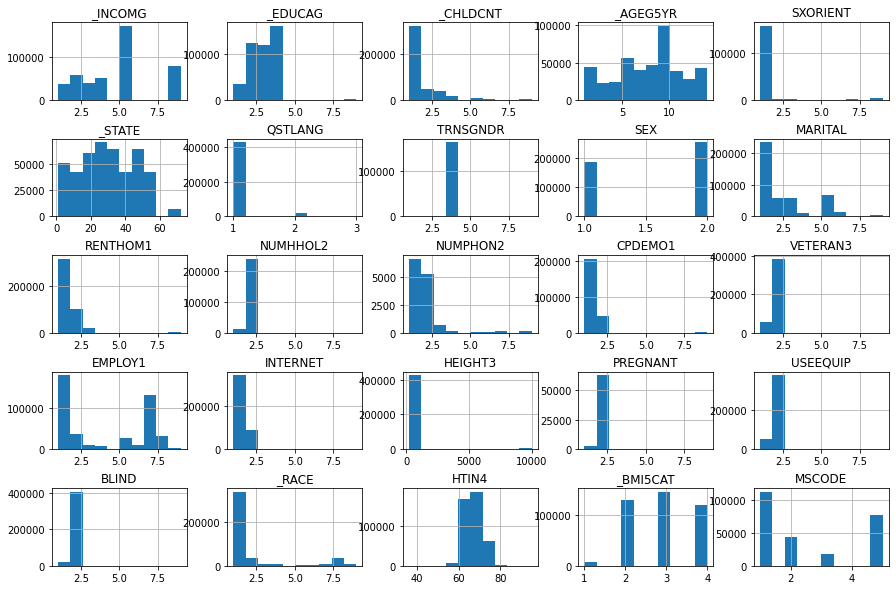

In [ ]:
#Demographic features within dataset
demographics = ['_INCOMG',	'_EDUCAG',	'_CHLDCNT',	'_AGEG5YR',	'SXORIENT', '_STATE','QSTLANG',	'TRNSGNDR',	'SEX',	'MARITAL', 	'RENTHOM1',	'NUMHHOL2',	'NUMPHON2',	'CPDEMO1',	'VETERAN3',	'EMPLOY1',	'INTERNET',	'HEIGHT3',	'PREGNANT',	'USEEQUIP',	'BLIND','_RACE','HTIN4','_BMI5CAT', 'MSCODE']

d = df[demographics]

#examine distribution of d 
d.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

A complete list of all demographic variables and a description of their values is available (Figure 1). Below is a brief overview of eleven of the demographic variables available.

<br>

**DEMOGRAPHICS**

**`_INCOMG`:** the response value 5 equates to an annual household income (from all sources). The response "$50,000 or more" represents the majority of the surveyed population at 39.29%.

**`_EDUCAG`:** the response value 4 equates to the level of education completed. The response "a graduate from college or technical school" represents the majority of the surveyed population at 36.61%.

**`_CHLDCNT`:** the response value 1 equates to the number of children in the household. The response "None" represents the majority of the surveyed population at 73.39%.

**`_AGEG5YR`:** the response value 9 equates to age range. The response "60 to 64" represents the majority of the surveyed population at 11.28%.

**`SXORIENT`:** the response value 1 equates to sexual orientation. The response "straight" represents the majority of the surveyed population at 94.13%.

**`_STATE`:** the response value 20 equates to state of residence. The response "Kansas" represents the majority of the surveyed population at 5.26%.

**`QSTLANG`:** the response value 1 equates to preferred language. The response "English" represents the majority of the surveyed population at 96.29%.

**`SEX`:** the response value 2 equates to gender. The response "female" represents the majority of the surveyed population at 57.65%. The male gender accounts for the remaining 42.35%.

**`MARITAL`:** the response value 1 equates to marital status. The response "married" represents the majority of the surveyed population at 52.83%.

**`_RACE`:** the response value 1 equates to race/ethnicity. The response "White only, non-Hispanic" represents the majority of the surveyed population at 76.13%.

**`_BMI5CAT`:** the response value 3 equates to Body Mass Index (BMI). The response categorized as "overweight" represents the majority of the surveyed population at 36.29%.

# Identifying & grouping observations

After examining the codebooks associated with each year, it becomes apparent that the survey questions are noted as belonging to a section based on their subject matter. As a result, I created 5 general groupings of these sections to better navigate the cleaning and initial feature reduction of this dataset. The 5 sections are the following: 

*   **Record Identification** - questions addressing record keeping
*   **Land Line & Cell Phone Introduction** - clarification questions about whomever answered the phone call
*   **Single Variables** - questions about health and lifestyle 
*   **Weighted Variables** - mostly arbitrary values relating to ommitted information on participants
*   **Calculated Variables** - variables generated from responses recorded in the "Single Variables" section 

<br>

A PDF document of all calculated variables and their explanation is available [here](https://github.com/martell-n-tardy/Risk-Prediction-Models-for-Type-2-Diabetes/blob/main/Calculated%20Variables/2015%20Calculated%20Variables.pdf) for 2015. Using this document, we are able to determine which of the features need to be removed in order to avoid redundancy or to reduce variables that provide unnecessary information based on the scope of the project.

## removing unnecessary *Record Identification* variables 

**Record Identification** includes 11 variables: `_STATE`, `FMONTH`, `IDATE`, `IMONTH`, `IDAY`, `IYEAR`, `DISPCODE`, `SEQNO`, `_PSU`, `QSTVER` and `QSTLANG`. After examining these variables 9 will be dropped, since information about when each survey call took place is not important.

In [ ]:
#remove features 
df = df.drop(columns = ['FMONTH','IDATE','IMONTH','IDAY','IYEAR','DISPCODE','SEQNO','_PSU','QSTVER'])
df

,_STATE,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,...,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,1.0,NaN,1.0,2.0,NaN,1.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,88.0,88.0,NaN,2.0,1.0,1.0,4.0,3.0,NaN,1.0,4.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,2876.0,493.0,1.0,5.397605e-79,60.0,60.0,2800.0,2800.0,168.0,5.397605e-79,5.397605e-79,5.397605e-79,168.0,5.397605e-79,168.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,15.0,88.0,88.0,1.0,2.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,7.0,2.0,1.0,2.0,NaN,2.0,1.0,2.0,1.0,...,1.0,1.000000e+00,1.000000e+00,9.0,NaN,NaN,2173.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,30.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,1.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,1.0,NaN,1.0,2.0,NaN,2.0,1.000000e+00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,20.0,88.0,30.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,1.0,...,1.0,1.000000e+00,5.397605e-79,2.0,NaN,NaN,2543.0,436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,4.0,4.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,1.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2136.0,366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0
441452,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,1.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,3727.0,639.0,1.0,5.397605e-79,30.0,NaN,5000.0,NaN,150.0,5.397605e-79,5.397605e-79,5.397605e-79,150.0,5.397605e-79,150.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
441453,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,4.0,88.0,20.0,88.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,2.0,...,1.0,1.000000e+00

Now, there are 321 features remaining.

## removing unnecessary *Land Line & Cell Phone Introduction* variables

**Land Line & Cell Phone Introduction** includes 17 variables: `CTELENUM, PVTRESD1, COLGHOUS, STATERES, CELLFON3, LADULT, NUMADULT, NUMMEN, NUMWOMEN, CTELNUM1, CELLFON2, CADULT, PVTRESD2, CCLGHOUS, CSTATE, LANDLINE,` and `HHADULT`. After examining these variables 17 will be dropped because they present unnessary value to the scope of the project.

In [ ]:
#remove features 
df = df.drop(columns = ['CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE', 'HHADULT'])
df

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,...,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,3.0,88.0,88.0,NaN,2.0,1.0,1.0,4.0,3.0,NaN,1.0,4.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,2.0,6.0,1.0,2.0,NaN,2.0,2.0,3.0,88.0,1.0,1.0,165.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,2876.0,493.0,1.0,5.397605e-79,60.0,60.0,2800.0,2800.0,168.0,5.397605e-79,5.397605e-79,5.397605e-79,168.0,5.397605e-79,168.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,4.0,15.0,88.0,88.0,1.0,2.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,7.0,2.0,1.0,2.0,NaN,2.0,1.0,2.0,1.0,2.0,2.0,3.0,NaN,2.0,2.0,4.0,1.0,2.0,NaN,1.0,2.0,7.0,88.0,99.0,2.0,158.0,...,1.0,1.000000e+00,1.000000e+00,9.0,NaN,NaN,2173.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,5.0,30.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,1.0,8.0,2.0,180.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,5.0,20.0,88.0,30.0,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,2.0,1.0,5.0,1.0,2.0,NaN,2.0,2.0,8.0,88.0,77.0,1.0,142.0,...,1.0,1.000000e+00,5.397605e-79,2.0,NaN,NaN,2543.0,436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,4.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,1.0,2.0,2.0,1.0,55.0,2.0,3.0,2.0,1.0,NaN,NaN,NaN,2.0,7.0,88.0,4.0,2.0,104.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2136.0,366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0
441452,72.0,1.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,5.0,1.0,NaN,NaN,NaN,2.0,1.0,1.0,2.0,1.0,160.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,3727.0,639.0,1.0,5.397605e-79,30.0,NaN,5000.0,NaN,150.0,5.397605e-79,5.397605e-79,5.397605e-79,150.0,5.397605e-79,150.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
441453,72.0,4.0,88.0,20.0,88.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,NaN,NaN,NaN,2.0,7.0,88.0,5.0,2.0,247.0,...,1.0,1.000000e+00,1.000000e+00,9.0,NaN,Na

Now, there are 304 features remaining.

## removing duplicate *Single Variables*

Now, all variables within the **Single Variables** section with a correlating variable in the Calculated Variables section that sufficiently reduces the number of response observations for a variable in the Single Variable will be removed. 

For example, the variable `GENHLTH` has been grouped into the Single Variables section and has 8 possible response categories, including null values. However, in the Calculated Variables section there is a corresponding variable, `_RFHLTH`, that reduces these multiple response categories to 3. Therefore, the variable `GENHLTH` will be removed to avoid redundancy.

In [ ]:
#remove features
df = df.drop(columns =['GENHLTH','BPHIGH4','ASTHMA3','HAVARTH3','WEIGHT2','CHILDREN','EDUCA','INCOME2','FRUITJU1','FRUIT1','FVBEANS','FVGREEN','FVORANG','VEGETAB1','EXERANY2','EXRACT11','EXRACT21','EXERHMM1','EXERHMM2','STRENGTH','SEATBELT','HIVTST6','HEIGHT3'])
df

,_STATE,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,INTERNET,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,...,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,NaN,1.0,2.0,8.0,2.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,88.0,88.0,NaN,2.0,1.0,1.0,4.0,NaN,1.0,4.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,2.0,1.0,2.0,NaN,2.0,2.0,3.0,1.0,NaN,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,2876.0,493.0,1.0,5.397605e-79,60.0,60.0,2800.0,2800.0,168.0,5.397605e-79,5.397605e-79,5.397605e-79,168.0,5.397605e-79,168.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,15.0,88.0,88.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,1.0,7.0,2.0,1.0,NaN,2.0,1.0,2.0,2.0,2.0,3.0,NaN,2.0,2.0,1.0,2.0,NaN,1.0,2.0,7.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,1.0,1.000000e+00,1.000000e+00,9.0,NaN,NaN,2173.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,30.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,1.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,NaN,1.0,2.0,8.0,2.0,NaN,1.0,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,20.0,88.0,30.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.000000e+00,5.397605e-79,2.0,NaN,NaN,2543.0,436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,55.0,2.0,3.0,1.0,NaN,NaN,NaN,2.0,7.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2136.0,366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0
441452,72.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,3727.0,639.0,1.0,5.397605e-79,30.0,NaN,5000.0,NaN,150.0,5.397605e-79,5.397605e-79,5.397605e-79,150.0,5.397605e-79,150.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
441453,72.0,88.0,20.0,88.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,2.0,7.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.000000e+00,1.000000e+00,9.0,NaN,NaN,2210.0,379.0,NaN,Na

23 variables from the *Single Variables* section were removed from the dataset (Appendix A). Therefore, there are now 281 features remaining.

## removing unnecessary *Weighted Variables*

**Weighting Variables** includes 9 variables: `MSCODE, _STSTR, _STRWT, _RAWRAKE, _WT2RAKE, _CLLCPWT, _DUALUSE, _DUALCOR`, and `_LLCPWT`. After examining these variables 8 were dropped.

In [ ]:
#remove features
df = df.drop(columns =['_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_CLLCPWT', '_DUALUSE', '_DUALCOR','_LLCPWT'])
df

,_STATE,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,INTERNET,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,...,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,NaN,1.0,2.0,8.0,2.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,88.0,88.0,NaN,2.0,1.0,1.0,4.0,NaN,1.0,4.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,2.0,1.0,2.0,NaN,2.0,2.0,3.0,1.0,NaN,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,2876.0,493.0,1.0,5.397605e-79,60.0,60.0,2800.0,2800.0,168.0,5.397605e-79,5.397605e-79,5.397605e-79,168.0,5.397605e-79,168.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,15.0,88.0,88.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,1.0,7.0,2.0,1.0,NaN,2.0,1.0,2.0,2.0,2.0,3.0,NaN,2.0,2.0,1.0,2.0,NaN,1.0,2.0,7.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,1.0,1.000000e+00,1.000000e+00,9.0,NaN,NaN,2173.0,373.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,30.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,1.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,NaN,1.0,2.0,8.0,2.0,NaN,1.0,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2469.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,20.0,88.0,30.0,1.0,1.0,2.0,1.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.000000e+00,5.397605e-79,2.0,NaN,NaN,2543.0,436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,55.0,2.0,3.0,1.0,NaN,NaN,NaN,2.0,7.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2136.0,366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0
441452,72.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397605e-79,3727.0,639.0,1.0,5.397605e-79,30.0,NaN,5000.0,NaN,150.0,5.397605e-79,5.397605e-79,5.397605e-79,150.0,5.397605e-79,150.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,1.0
441453,72.0,88.0,20.0,88.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,1.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,2.0,7.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.000000e+00,1.000000e+00,9.0,NaN,NaN,2210.0,379.0,NaN,Na

Now, there are 273 features remaining.

## removing unnecessary *Calculated Variables*

Next, all **Calcultated Variables** generated with age restrictions or have response observations that are overaly simplified will be removed.

An age restriction example, `_HCVU651` is a variable derived from the variables `AGE` and `HLTHPLN1` generated using respondents aged 18-64 who have any form of health care coverage. There are 3 resulting responses observed that are limited by range of age.

A overly simplified example, `_CHOLCHK` is a variable derived from the variables `BLOODCHO` and `CHOLCHK`. The `CHOLCHK` variable identifies responses corresponding to the frequency of chloesterol checks. Participants can respond with a range of between the past year to over 5 years or more. The `_CHOLCHK` variable reduces these responses to if a chloesterol check has occurred within 5 years or not.

By default, deciding to keep certain Calcultated Variables will mean the removal of the Single Variables that it derives from to avoid redundancy.


In [ ]:
#remove features
df = df.drop(columns =['_HCVU651','_CHOLCHK','BLOODCHO','TOLDHI2','_CASTHM1','ASTHNOW','_LTASTH1','_MRACE1','_RACEG21', '_RACEGR3', '_RACE_G1','_HISPANC','_PRACE1','_AGE65YR','_AGE80', '_AGE_G','HTM4','WTKG3','_BMI5','_RFBMI5','_RFSMOK3','SMOKE100','SMOKDAY2','DRNKANY5','_RFBING5','_MISFRTN','_MISVEGN','_FRTRESP', '_VEGRESP', '_FRUTSUM', '_VEGESUM', '_FRT16', '_VEG23', '_FRUITEX','_VEGETEX','MAXVO2_','FC60_','PADUR1_', 'PADUR2_', 'PAFREQ1_', 'PAFREQ2_', '_MINAC11', '_MINAC21', 'PAMISS1_', 'PAMIN11_', 'PAMIN21_', 'PA1MIN_', 'PAVIG11_', 'PAVIG21_', 'PA1VIGM_', '_PASTAE1','LMTJOIN3','ARTHDIS2','ARTHSOCL','_RFSEAT3','METVL11_','METVL21_','_FLSHOT6','_PNEUMO2'])
df

,_STATE,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPMEDS,CHOLCHK,CVDINFR4,CVDCRHD4,CVDSTRK3,CHCSCNCR,CHCOCNCR,CHCCOPD1,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,INTERNET,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,STOPSMK2,LASTSMK2,USENOW3,...,_RFHYPE5,_RFCHOL,_MICHD,_ASTHMS1,_DRDXAR1,_RACE,_AGEG5YR,HTIN4,_BMI5CAT,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,DROCDY3_,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRTLT1,_VEGLT1,_TOTINDA,ACTIN11_,ACTIN21_,STRFREQ_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_AIDTST3
0,1.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,NaN,1.0,2.0,8.0,2.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,NaN,2.0,3.0,...,2.0,2.0,2.0,1.0,1.0,1.0,9.0,70.0,4.0,1.0,2.0,2.0,3.0,5.397605e-79,5.397605e-79,1.0,1.700000e+01,3.300000e+01,6.700000e+01,3.300000e+01,17.0,100.0,2.0,1.0,2.0,NaN,NaN,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0
1,1.0,88.0,88.0,NaN,2.0,1.0,1.0,4.0,NaN,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,2.0,1.0,2.0,NaN,2.0,2.0,3.0,1.0,NaN,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,3.0,...,1.0,1.0,2.0,3.0,2.0,1.0,7.0,68.0,3.0,1.0,4.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,7.000000e+00,1.700000e+01,7.000000e+00,2.900000e+01,29.0,13.0,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0
2,1.0,15.0,88.0,88.0,1.0,2.0,2.0,1.0,NaN,1.0,7.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,NaN,2.0,2.0,1.0,2.0,NaN,1.0,2.0,7.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,3.0,1.0,1.0,11.0,71.0,2.0,1.0,2.0,9.0,9.0,9.000000e+02,9.990000e+04,9.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,9.0,NaN,NaN,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,30.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,NaN,1.0,2.0,8.0,2.0,NaN,1.0,2.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,3.0,...,2.0,2.0,2.0,3.0,1.0,1.0,9.0,67.0,3.0,2.0,2.0,5.0,4.0,5.397605e-79,5.397605e-79,1.0,5.397605e-79,1.000000e+02,5.397605e-79,3.000000e+00,3.0,14.0,1.0,2.0,2.0,NaN,NaN,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,9.0
4,1.0,20.0,88.0,30.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,2.0,NaN,2.0,2.0,8.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,3.0,...,1.0,1.0,2.0,3.0,1.0,1.0,9.0,64.0,2.0,1.0,3.0,9.0,4.0,5.397605e-79,5.397605e-79,1.0,NaN,2.000000e+02,4.300000e+01,5.700000e+01,33.0,67.0,9.0,1.0,2.0,NaN,NaN,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,55.0,2.0,3.0,1.0,NaN,NaN,NaN,2.0,7.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,3.0,...,2.0,2.0,2.0,3.0,1.0,8.0,11.0,63.0,1.0,1.0,1.0,2.0,4.0,5.397605e-79,5.397605e-79,1.0,2.900000e+01,5.397605e-79,7.100000e+01,5.397605e-79,14.0,14.0,2.0,2.0,2.0,NaN,NaN,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0,3.0,1.0,2.0
441452,72.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,3.0,...,1.0,1.0,2.0,3.0,2.0,8.0,2.0,63.0,3.0,2.0,3.0,1.0,4.0,5.397605e-79,5.397605e-79,1.0,1.700000e+01,1.000000e+02,2.900000e+01,1.000000e+01,14.0,29.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0
441453,72.0,88.0,20.0,88.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,2.0,7.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,7.0,3.0,...,2.0,2.0,2.0,3.0,2.0,8.0,11.0,65.0,4.0,1.0,2.0,3.0,3.0,7.000000e+00,9

59 variables from the Calculated Variables or Single Variables section were removed from the dataset (Appendix B). Therefore, now there are 214 features remaining.

# Examining final BRFSS dataset

## grouping of remaining features

The remaining 215 features in the dataset are now grouped based on their subject matter, in order to make collecting our variables of interest easier (Table 1). 

Here is the list of groups and the number of variables within each:

*   **General Health** - 11
*   **Health Care** - 4
*   **Hypertension** - 2
*   **Cholesterol** - 2
*   **Chronic Conditions** - 9
*   **Tobacco Use** - 4
*   **Alcohol Consumption** - 7
*   **Fruits & Vegetables** - 8
*   **Physical Activity** - 17
*   **Arthritis** - 9
*   **Immunization & Vaccination** - 8
*   **HIV/AIDS** - 3
*   **Pre-Diabetes** - 2
*   **Diabetes** - 11
*   **Caregiver** - 9
*   **Cognitive Decline** - 8
*   **Sodium** - 3
*   **Asthma** - 11
*   **Cancer Screening** - 22
*   **Social Context** - 6
*   **Demographics** - 24
*   **Random Child** - 7
*   **Anxiety & Depression** - 10
*   **Safety** - 1
*   **Vision** - 9
*   **Cardiovascular Health** - 7



# Handling missing values

The dataset will now be examined categorically to understand the percentage of null values recorded for each variable. Variables with more than 95% null observations recorded will be removed from the dataset. Variables with less than 95% null values recorded will be handled by converting these blank observations to the equivalent value used to record "refused" or "don't know" survey responses. If there is no recording of such responses, a generic value similar to the format of the responses found will be used in these cases. The BRFSS 2015 Codebook will be referenced to understand the responses recorded for each variable, so that the appropriate conversion can be made.

In [ ]:
#function to print percentage of null values for variables

def missing_values(x):
  z = df[x]
  
  #examining null values in z
  z_null = pd.concat([z.isnull().sum(), 100 * z.isnull().mean()], axis=1)
  z_null.columns=['count','%']

  print(z_null.sort_values(by= 'count', ascending=False))

In [ ]:
#General Health
x = ['_RFHLTH','PHYSHLTH','MENTHLTH','POORHLTH','PAINACT2','QLMENTL2','QLSTRES2','QLHLTH2','EMTSUPRT','LSATISFY','QLACTLM2']
missing_values(x)

           count           %
PAINACT2  441456  100.000000
QLMENTL2  441456  100.000000
QLSTRES2  441456  100.000000
QLHLTH2   441456  100.000000
LSATISFY  421404   95.457758
EMTSUPRT  421392   95.455040
POORHLTH  214492   48.587402
QLACTLM2    9338    2.115273
PHYSHLTH       1    0.000227
_RFHLTH        0    0.000000
MENTHLTH       0    0.000000


There are six variables above the 95% threshold for null observations. Therefore, all six variables will be dropped from the dataset. 

Next, the null values in variables `POORHLTH` and `QLACTLM2` will be addressed. In the BRFSS 2015 Codebook code "99.0" is used to capture people who "refused" to respond to questions `POORHLTH` and `PHYSHLTH` and code "9.0" in response to question `QLACTLM2`. Therefore, their null observations will be converted to these values respectively.

In [ ]:
#removing variables with over 95% missing values.
df = df.drop(columns =['PAINACT2','QLMENTL2','QLSTRES2','QLHLTH2','LSATISFY','EMTSUPRT'])

#replace all null values in POORHLTH and QLACTLM2
df.fillna({'POORHLTH': 99.0, 'PHYSHLTH': 99.0, 'QLACTLM2': 9.0}, inplace=True)

Now, there are 209 features remaining in the dataset.

In [ ]:
#Health Care
x = ['PERSDOC2','MEDCOST','HLTHPLN1','CHECKUP1']
missing_values(x)

          count         %
MEDCOST       1  0.000227
CHECKUP1      1  0.000227
PERSDOC2      0  0.000000
HLTHPLN1      0  0.000000


There are no variables above the 95% threshold for null observations. Therefore, all four variables will remain in the dataset. 

Next, the null values in variables `MEDCOST` and `CHECKUP1` will be addressed. In the BRFSS 2015 Codebook code "9.0" is used to capture people who "refused" to respond to variables `MEDCOST` and `CHECKUP1`. Therefore, the null observations will be converted to this value.

In [ ]:
#replace all null values in MEDCOST and CHECKUP1 with 9.0
df.update(df[['MEDCOST','CHECKUP1']].fillna(value = 9.0))

In [ ]:
#Hypertension
x = ['_RFHYPE5','BPMEDS']
missing_values(x)

           count          %
BPMEDS    263268  59.636294
_RFHYPE5       0   0.000000


There are no variables above the 95% threshold for null observations. Therefore, both variables will remain in the dataset.

Now, lets handle the null values for variable `BPMEDS`. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" to respond to this question therefore, the null observations for this variable will be converted to the value "9.0".

In [ ]:
#replace all null values in BPMEDS with 9.0
df['BPMEDS'] = df['BPMEDS'].fillna(value = 9.0)

In [ ]:
#Cholesterol
x = ['_RFCHOL','CHOLCHK']
missing_values(x)

         count         %
_RFCHOL  59154  13.39975
CHOLCHK  59154  13.39975


There are no variables above the 95% threshold for null observations. Therefore, both variables will remain in the dataset.

Now, lets handle the null values for variables _RFCHOL and CHOLCHK. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" or "did not know/not sure" in response to these questions therefore, the null observations for these variables will be converted to the value "9.0".

In [ ]:
#replace all null values in _RFCHOL and CHOLCHK with 9.0
df.update(df[['_RFCHOL','CHOLCHK']].fillna(value = 9.0))

In [ ]:
#Chronic Conditions
x = ['CVDINFR4','CVDSTRK3',	'CHCSCNCR',	'CHCOCNCR',	'CHCCOPD1',	'ADDEPEV2',	'CHCKIDNY',	'CVDCRHD4',	'_MICHD']
missing_values(x)

          count         %
_MICHD     3942  0.892954
CHCSCNCR      1  0.000227
CVDCRHD4      1  0.000227
CVDINFR4      0  0.000000
CVDSTRK3      0  0.000000
CHCOCNCR      0  0.000000
CHCCOPD1      0  0.000000
ADDEPEV2      0  0.000000
CHCKIDNY      0  0.000000


There are no variables above the 95% threshold for null observations. Therefore, all nine variables will remain in the dataset.

Now, lets handle the null values for variables _MICHD, CHCSCNCR and CVDCRHD4. In the BRFSS 2015 Codebook no code was used for variable _MICHD and code "9.0" is used for variables CHCSCNCR and CVDCRHD4. Therefore, the null observations for these variables will be converted to the value "9.0" for consistency.

In [ ]:
#replace all null values in _MICHD, CHCSCNCR and CVDCRHD4 with 9.0
df.update(df[['CVDCRHD4','CHCSCNCR','_MICHD']].fillna(value = 9.0))

In [ ]:
#Tobacco Use
x = ['STOPSMK2', 'LASTSMK2', 'USENOW3', '_SMOKER3']
missing_values(x)

           count          %
STOPSMK2  379938  86.064749
LASTSMK2  319266  72.321137
USENOW3    14890   3.372930
_SMOKER3       0   0.000000


There are no variables above the 95% threshold for null observations. Therefore, all four variables will remain in the dataset.

Now, lets handle the null values for variables `STOPSMK2`, `LASTSMK2` and `USENOW3`. In the BRFSS 2015 Codebook code "99.0" was used for `LASTSMK2` and code "9.0" for `USENOW3` and `STOPSMK2`. Therefore, the null observations for these variables will be converted to these values respectively.

In [ ]:
#replace all null values in LASTSMK2, USENOW3 and STOPSMK2
df.fillna({'LASTSMK2': 99.0, 'USENOW3': 9.0, 'STOPSMK2': 9.0}, inplace=True)

In [ ]:
#Alcohol Consumption
x = ['ALCDAY5', 'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'DROCDY3_' , '_DRNKWEK', '_RFDRHV5']
missing_values(x)

           count          %
MAXDRNKS  231439  52.426289
DRNK3GE5  231036  52.335001
AVEDRNK2  230618  52.240314
ALCDAY5    15931   3.608740
DROCDY3_       0   0.000000
_DRNKWEK       0   0.000000
_RFDRHV5       0   0.000000


There are no variables above the 95% threshold for null observations. Therefore, all seven variables will remain in the dataset.

Now, let's handle the null values for variables ALCDAY5, AVEDRNK2, DRNK3GE5 and MAXDRNKS. In the BRFSS 2015 Codebook code "99.0" was used for AVEDRNK2, DRNK3GE5 and MAXDRNKS and code "999.0" for ALCDAY5 therefore, the null observations for these variables will be converted to these values respectively.

In [ ]:
#replace all null values in AVEDRNK2, DRNK3GE5, ALCDAY5 and MAXDRNKS
df.fillna({'AVEDRNK2': 99.0, 'DRNK3GE5': 99.0, 'MAXDRNKS': 99.0, 'ALCDAY5': 999.0}, inplace=True)

In [ ]:
#Fruits & Vegetables
x = ['FTJUDA1_', 'FRUTDA1_', 'BEANDAY_', 'GRENDAY_', 'ORNGDAY_', 'VEGEDA1_', '_FRTLT1', '_VEGLT1']
missing_values(x)

          count         %
VEGEDA1_  41463  9.392329
BEANDAY_  39947  9.048920
ORNGDAY_  39258  8.892845
FTJUDA1_  38535  8.729069
GRENDAY_  37949  8.596327
FRUTDA1_  36582  8.286670
_FRTLT1       0  0.000000
_VEGLT1       0  0.000000


There are no variables above the 95% threshold for null observations. Therefore, all eight variables will remain in the dataset.

Now, lets handle the null values for variables FTJUDA1_, FRUTDA1_, BEANDAY_, GRENDAY_, ORNGDAY_ and VEGEDA1_. In the BRFSS 2015 Codebook code there was no code used for "refused" to respond observations for any of these variables. Therefore, the generic code "99990.0" will be used for the conversion of null values within these variables.

In [ ]:
#replace all null values in FTJUDA1_, FRUTDA1_, BEANDAY_, GRENDAY_, ORNGDAY_ and VEGEDA1_ with 99990.0
df.update(df[['FTJUDA1_', 'FRUTDA1_', 'BEANDAY_', 'GRENDAY_', 'ORNGDAY_', 'VEGEDA1_']].fillna(value = 99990.0))

In [ ]:
#Physical Activity
x = ['_TOTINDA',	'EXEROFT1',	'EXEROFT2',	'STRFREQ_',	'EXACTOT1',	'EXACTOT2',	'_PAINDX1',	'_PASTRNG',	'_PAREC1',	'_PA30021',	'_PA300R2',	'_PA150R2',	'_PACAT1','ACTIN11_',	'ACTIN21_','DIFFWALK','DIFFDRES']
missing_values(x)

           count          %
EXACTOT1  428378  97.037530
EXACTOT2  424832  96.234279
EXEROFT2  244540  55.393969
ACTIN21_  154872  35.082092
ACTIN11_  150022  33.983455
EXEROFT1  147431  33.396533
STRFREQ_   44013   9.969963
DIFFDRES   12728   2.883187
DIFFWALK   12334   2.793936
_PA150R2       0   0.000000
_PACAT1        0   0.000000
_TOTINDA       0   0.000000
_PA300R2       0   0.000000
_PA30021       0   0.000000
_PASTRNG       0   0.000000
_PAINDX1       0   0.000000
_PAREC1        0   0.000000


There are two variables above the 95% threshold for null observations. Therefore, the variables `EXACTOT1` and `EXACTOT2` will be removed from the dataset.

Now, lets handle the null values for variables `EXEROFT2`,`EXEROFT1`, `ACTIN11_`,	`ACTIN21_`, `DIFFWALK`, `DIFFDRES` and `STRFREQ_`. In the BRFSS 2015 Codebook code "999.0" was used to capture people who "refused" in response to `EXEROFT2` and `EXEROFT1` questions, therefore the null observations for these variables will be converted to the value "999.0". However, code "99000.0" was used for variable `STRFREQ_`. Therefore, the null observations for this variable will be converted to the value "99000.0". Lastly, there was no code for "refused" to respond for variables `ACTIN11_` and	`ACTIN21_`, but the code "9.0" was used for variables `DIFFWALK` and	`DIFFDRES`. Therefore, the code "9.0" will be used to convert the null values for these four variables.

In [ ]:
#removing variables with over 95% missing values
df = df.drop(columns =['EXACTOT1','EXACTOT2'])

#replace all null values in ACTIN11_, ACTIN21_, DIFFWALK, DIFFDRES, EXEROFT2, EXEROFT1, and _MICHD
df.fillna({'EXEROFT2': 999.0, 'EXEROFT1': 999.0, 'STRFREQ_': 99000.0, 'ACTIN11_': 9.0, 'ACTIN21_': 9.0,'DIFFWALK': 9.0,'DIFFDRES': 9.0}, inplace=True)

Now, there are 207 features remaining in the dataset.

In [ ]:
#Arthritis
x = ['JOINPAIN',	'ARTTODAY',	'ARTHWGT',	'ARTHEXER',	'ARTHEDU',	'_DRDXAR1',	'_LMTACT1',	'_LMTWRK1',	'_LMTSCL1']
missing_values(x)

           count          %
ARTHEDU   421796  95.546555
ARTHEXER  421786  95.544290
ARTHWGT   421781  95.543157
ARTTODAY  421769  95.540439
JOINPAIN  307728  69.707513
_DRDXAR1    2799   0.634038
_LMTACT1    2799   0.634038
_LMTWRK1    2799   0.634038
_LMTSCL1    2799   0.634038


There are four variables above the 95% threshold for null observations. Therefore, the variables `ARTHEDU`, `ARTHEXER`, `ARTHWGT`, and `ARTTODAY` will be removed from the dataset.

Now, lets handle the null values for variables `JOINPAIN`, `_DRDXAR1`, `_LMTACT1`, `_LMTWRK1`, and  `_LMTSCL1`. In the BRFSS 2015 Codebook code "99.0" was used to capture people who "refused" in response to `JOINPAIN` questions and code "9.0" in response to questions `_DRDXAR1`, `_LMTACT1`, `_LMTWRK1`, and  `_LMTSCL1`. Therefore, the null observations for these variables will be converted to their respective values.

In [ ]:
#removing variables with over 95% missing values
df = df.drop(columns =['ARTTODAY',	'ARTHWGT',	'ARTHEXER',	'ARTHEDU'])

#replace all null values in JOINPAIN with 99.0
df.fillna({'JOINPAIN': 99.0, '_DRDXAR1': 9.0, '_LMTACT1': 9.0, '_LMTWRK1': 9.0, '_LMTSCL1': 9.0}, inplace=True)

Now, there are 203 features remaining in the dataset.

In [ ]:
#Immunization & Vaccination
x = ['FLUSHOT6',	'FLSHTMY2',	'IMFVPLAC',	'PNEUVAC3',	'TETANUS', 'HPVADVC2',	'HPVADSHT', 'SHINGLE2']
missing_values(x)

           count          %
HPVADSHT  440008  99.671994
HPVADVC2  430533  97.525688
SHINGLE2  413397  93.643987
TETANUS   400869  90.806105
FLSHTMY2  251262  56.916658
IMFVPLAC  250257  56.689002
PNEUVAC3   41943   9.501060
FLUSHOT6   41381   9.373754


There are two variables above the 95% threshold for null observations. Therefore, both variables `HPVADVC2` and	`HPVADSHT` will be removed from the dataset.

Now, lets handle the null values for variables `FLUSHOT6`, `FLSHTMY2`, `PNEUVAC3`, `TETANUS`,`IMFVPLAC`, and `SHINGLE2`. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" in response to `FLUSHOT6`, `PNEUVAC3`, `SHINGLE2` and `TETANUS` questions, therefore the null observations for these variables will be converted to the value "9.0". For variable `IMFVPLAC` the code "99.0" and for variable `FLSHTMY2` the code "999999.0". The null values for these last two variables will be converted to these values respectively.

In [ ]:
#removing variables with over 95% missing values.
df = df.drop(columns =['HPVADVC2',	'HPVADSHT'])

#replace all null values in FLUSHOT6, PNEUVAC3, SHINGLE2, TETANUS, IMFVPLAC and FLSHTMY2
df.fillna({'FLUSHOT6': 9.0, 'PNEUVAC3': 9.0, 'SHINGLE2': 9.0, 'TETANUS': 9.0, 'IMFVPLAC': 99.0,'FLSHTMY2': 999999.0}, inplace=True)

Now, there are 201 features remaining in the dataset.

In [ ]:
#HIV/AIDS
x = ['HIVTSTD3', '_AIDTST3', 'WHRTST10']
missing_values(x)

           count          %
WHRTST10  327938  74.285546
HIVTSTD3  327764  74.246131
_AIDTST3   43387   9.828160


There are no variables above the 95% threshold for null observations. Therefore, all three variables will remain in the dataset.

Now, lets handle the null values for variables HIVTSTD3, _AIDTST3, and WHRTST10. In the BRFSS 2015 Codebook code "999999.0" was used to capture people who "refused" in response to HIVTSTD3, code "9.0" in response to _AIDTST3 and code "99.0" in response to WHRTST10. Therefore, the null observations for these variables will be converted respectively.

In [ ]:
#replace all null values in HIVTSTD3, _AIDTST3 and WHRTST10
df.fillna({'HIVTSTD3': 999999.0, '_AIDTST3': 9.0, 'WHRTST10': 99.0}, inplace=True)

In [ ]:
#Pre-Diabetes
x = ['PDIABTST', 'PREDIAB1']
missing_values(x)

           count          %
PDIABTST  358696  81.252945
PREDIAB1  358696  81.252945


There are no variables above the 95% threshold for null observations. Therefore, both variables will remain in the dataset.

Now, lets handle the null values for variables PDIABTST and PREDIAB1. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" in response to these variables. Therefore, the null observations for these variables will be converted to the value "9.0".

In [ ]:
#replace all null values in PDIABTST and PREDIAB1 with 9.0
df.update(df[['PDIABTST','PREDIAB1']].fillna(value = 9.0))

In [ ]:
#Diabetes
x = ['INSULIN',	'BLDSUGAR',	'FEETCHK2',	'DOCTDIAB',	'CHKHEMO3',	'FEETCHK',	'EYEEXAM',	'DIABEYE',	'DIABEDU',	'DIABETE3','DIABAGE2']
missing_values(x)

           count          %
FEETCHK   412317  93.399342
DIABEYE   412040  93.336595
DIABEDU   412040  93.336595
CHKHEMO3  412039  93.336369
EYEEXAM   412039  93.336369
DOCTDIAB  412038  93.336142
FEETCHK2  412035  93.335463
BLDSUGAR  412033  93.335010
INSULIN   412032  93.334783
DIABAGE2  384203  87.030871
DIABETE3       7   0.001586


There are no variables above the 95% threshold for null observations. Therefore, all eleven variables will remain in the dataset.

Now, lets handle the null values for the remaining variables in this category. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" in response to FEETCHK, DIABEYE, DIABEDU, EYEEXAM, DIABETE3 and INSULIN questions. For variables CHKHEMO3, DOCTDIAB and DIABAGE2 the code "99.0" and for variables FEETCHK2 and BLDSUGAR the code "999.0". The null values for these variables will be converted to their new values respectively.

In [ ]:
#replace all null values in FEETCHK, DIABEYE, DIABEDU, EYEEXAM, INSULIN, DIABETE3, CHKHEMO3, DOCTDIAB, DIABAGE2, FEETCHK2 and BLDSUGAR
df.fillna({'FEETCHK': 9.0, 'DIABEYE': 9.0, 'DIABEDU': 9.0, 'EYEEXAM': 9.0, 'INSULIN': 9.0, 'DIABETE3': 9.0, 'CHKHEMO3': 99.0, 'DOCTDIAB': 99.0, 'DIABAGE2': 99.0, 'FEETCHK2': 999.0, 'BLDSUGAR': 999.0}, inplace=True)

In [ ]:
#Caregiver
x = ['CAREGIV1','CRGVREL1',	'CRGVLNG1',	'CRGVHRS1',	'CRGVPRB1',	'CRGVPERS',	'CRGVHOUS',	'CRGVMST2',	'CRGVEXPT']
missing_values(x)

           count          %
CRGVMST2  417634  94.603766
CRGVHOUS  417571  94.589495
CRGVPERS  417554  94.585644
CRGVPRB1  417524  94.578848
CRGVHRS1  417493  94.571826
CRGVLNG1  417461  94.564577
CRGVREL1  417436  94.558914
CRGVEXPT  356769  80.816435
CAREGIV1  332461  75.310110


There are no variables above the 95% threshold for null observations. Therefore, all nine variables will remain in the dataset.

Now, lets handle the null values for this category. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" in response to CRGVMST2, CRGVHOUS, CRGVPERS, CRGVHRS1, CRGVLNG1, CRGVEXPT and CAREGIV1 questions. For variables CRGVPRB1 and CRGVREL1 the code "99.0". The null values for these variables will be converted to their new values respectively.

In [ ]:
#replace all null values in CRGVMST2, CRGVHOUS, CRGVPERS, CRGVHRS1, CRGVLNG1, CRGVEXPT, CAREGIV1, CRGVPRB1 and CRGVREL1
df.fillna({'CAREGIV1': 9.0, 'CRGVLNG1': 9.0,	'CRGVHRS1': 9.0,	'CRGVPERS': 9.0,	'CRGVHOUS': 9.0,	'CRGVMST2': 9.0,	'CRGVEXPT': 9.0, 'CRGVPRB1': 99.0, 'CRGVREL1': 99.0}, inplace=True)

In [ ]:
#Cognitive Decline
x = ['CIMEMLOS',	'CDHOUSE', 'CDASSIST',	'CDHELP',	'CDSOCIAL',	'CDDISCUS', 'DECIDE', 'DIFFALON']
missing_values(x)

           count          %
CDHELP    437130  99.020061
CDDISCUS  428255  97.009668
CDSOCIAL  428238  97.005817
CDASSIST  428215  97.000607
CDHOUSE   428200  96.997209
CIMEMLOS  324727  73.558180
DIFFALON   13326   3.018647
DECIDE     11740   2.659382


There are five variables above the 95% threshold for null observations. Therefore, the variables `CIMEMLOS`, `CDHOUSE`, `CDASSIST`,	`CDHELP`,	`CDSOCIAL` and `CDDISCUS` will be removed from the dataset.

Now, let's examine variables `CIMEMLOS`, `DIFFALON`, and `DECIDE` null values to see how best to handle them. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" in response to `CIMEMLOS`, `DIFFALON` and `DECIDE`. Therefore, the null observations for these variables will be converted to the value "9.0".

In [ ]:
#removing variables with over 95% missing values.
df = df.drop(columns =['CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS'])

#replace all null values in CIMEMLOS, DIFFALON, and DECIDE with 9.0
df.update(df[['CIMEMLOS', 'DIFFALON', 'DECIDE']].fillna(value = 9.0))

Now, there are 196 features remaining in the dataset.

In [ ]:
#Sodium
x = ['WTCHSALT', 'LONGWTCH','DRADVISE']
missing_values(x)

           count          %
LONGWTCH  415994  94.232268
DRADVISE  400193  90.652976
WTCHSALT  400157  90.644821


There are no variables above the 95% threshold for null observations. Therefore, all three variables will remain in the dataset.

Now, let's examine variables LONGWTCH, DRADVISE, and WTCHSALT null values to see how best to handle them. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" in response to DRADVISE and WTCHSALT and code "999.0" in response to LONGWTCH. Therefore, the null observations for these variables will be converted to their respective values.

In [ ]:
#replace all null values in DRADVISE, WTCHSALT and LONGWTCH
df.fillna({'DRADVISE': 9.0, 'WTCHSALT': 9.0,	'LONGWTCH': 999.0}, inplace=True)

In [ ]:
#Asthma
x = ['ASTHMAGE',	'ASATTACK',	'ASERVIST',	'ASDRVIST',	'ASRCHKUP',	'ASACTLIM',	'ASYMPTOM','ASNOSLEP', 'ASTHMED3',	'ASINHALR',	'_ASTHMS1']
missing_values(x)

           count          %
ASDRVIST  441144  99.929325
ASERVIST  441143  99.929098
ASNOSLEP  440999  99.896479
ASTHMED3  440817  99.855252
ASINHALR  440817  99.855252
ASYMPTOM  440815  99.854799
ASRCHKUP  440812  99.854119
ASACTLIM  440812  99.854119
ASATTACK  440808  99.853213
ASTHMAGE  440433  99.768267
_ASTHMS1       0   0.000000


There are ten variables above the 95% threshold for null observations. Therefore, all variables except `_ASTHMS1` will be removed from the dataset.

There are no null values to handle within the variable `_ASTHMS1`.

In [ ]:
#removing variables with over 95% missing values.
df = df.drop(columns =['ASTHMAGE', 'ASATTACK',	'ASERVIST',	'ASDRVIST',	'ASRCHKUP',	'ASACTLIM',	'ASYMPTOM','ASNOSLEP', 'ASTHMED3',	'ASINHALR'])

Now, there are 186 features remaining in the dataset.

In [ ]:
#Cancer Screening
x = ['HADMAM',	'HOWLONG',	'HADPAP2',	'LASTPAP2',	'HPVTEST',	'HPLSTTST',	'HADHYST2',	'PROFEXAM',	'LENGEXAM',	'BLDSTOOL',	'LSTBLDS3',	'HADSIGM3',	'HADSGCO1',	'LASTSIG3',	'PCPSAAD2',	'PCPSADI1',	'PCPSARE1',	'PSATEST1',	'PSATIME',	'PCPSARS1',	'PCPSADE1',	'PCDMDECN']
missing_values(x)

           count          %
PCDMDECN  441201  99.942237
PCPSADE1  440637  99.814478
PCPSARS1  437825  99.177494
PSATIME   437822  99.176815
LENGEXAM  436523  98.882561
PROFEXAM  435811  98.721277
PSATEST1  434841  98.501549
PCPSARE1  434841  98.501549
PCPSADI1  434836  98.500417
PCPSAAD2  434829  98.498831
HPLSTTST  434549  98.435405
HOWLONG   422914  95.799808
LSTBLDS3  421679  95.520052
LASTPAP2  420189  95.182532
HADHYST2  418889  94.888052
HPVTEST   418667  94.837764
HADPAP2   418654  94.834819
HADMAM    418643  94.832328
LASTSIG3  402098  91.084502
HADSGCO1  402095  91.083823
HADSIGM3  387113  87.690053
BLDSTOOL  387081  87.682804


There are 14 variables above the 95% threshold for null observations. Therefore, all variables except eight will be removed from the dataset.

Now, let's examine variables `BLDSTOOL`, `HADSIGM3`, `HADSGCO1`, `LASTSIG3`, `HADMAM`, `HADPAP2`, `HPVTEST`, and `HADHYST2` null values to see how best to handle them. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" in response to these variables. Therefore, the null observations for these variables will be converted to the value "9.0".

In [ ]:
#removing variables with over 95% missing values.
df = df.drop(columns =['HOWLONG',	'LASTPAP2',	'HPLSTTST',	'PROFEXAM',	'LENGEXAM',	'LSTBLDS3',	'PCPSAAD2',	'PCPSADI1',	'PCPSARE1',	'PSATEST1',	'PSATIME',	'PCPSARS1',	'PCPSADE1',	'PCDMDECN'])

#replace all null values in BLDSTOOL, HADSIGM3, HADSGCO1, LASTSIG3, HADMAM, HADPAP2, HPVTEST, and HADHYST2 
df.update(df[['BLDSTOOL', 'HADSIGM3', 'HADSGCO1', 'LASTSIG3', 'HADMAM', 'HADPAP2', 'HPVTEST', 'HADHYST2']].fillna(value = 9.0))

Now, there are 172 features remaining in this dataset.

In [ ]:
#Social Context
x = ['SCNTMNY1',	'SCNTMEL1',	'SCNTPAID',	'SCNTWRK1',	'SCNTLPAD',	'SCNTLWK1']
missing_values(x)

           count          %
SCNTLPAD  415751  94.177223
SCNTWRK1  406722  92.131945
SCNTPAID  406701  92.127188
SCNTLWK1  403034  91.296528
SCNTMNY1  371954  84.256189
SCNTMEL1  368096  83.382262


There are no variables above the 95% threshold for null observations. Therefore, all six variables will remain in the dataset.

 Now, let's examine variables `SCNTMNY1`, `SCNTMEL1`,	`SCNTPAID`,	`SCNTWRK1`, `SCNTLPAD`, and	`SCNTLWK1` null values to see how best to handle them. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" in response to variables `SCNTMNY1`,	`SCNTMEL1`,	`SCNTPAID`, and `SCNTLPAD` and code "99.0" in response to variables `SCNTWRK1` and `SCNTLWK1`. Therefore, the null observations for these variables will be converted to their respective values.

In [ ]:
#replace all null values in SCNTMNY1, SCNTMEL1, SCNTPAID, SCNTWRK1, SCNTLPAD, and SCNTLWK1
df.fillna({'SCNTMNY1': 9.0, 'SCNTMEL1': 9.0,	'SCNTPAID': 9.0, 'SCNTWRK1': 99.0 , 'SCNTLPAD': 9.0 , 'SCNTLWK1': 99.0 }, inplace=True)

In [ ]:
#Demographics
x = ['_INCOMG',	'_EDUCAG',	'_CHLDCNT',	'_AGEG5YR',	'SXORIENT', '_STATE','QSTLANG',	'TRNSGNDR',	'SEX',	'MARITAL', 	'RENTHOM1',	'NUMHHOL2',	'NUMPHON2',	'CPDEMO1',	'VETERAN3',	'EMPLOY1',	'INTERNET',	'PREGNANT',	'QLACTLM2',	'USEEQUIP',	'BLIND', '_RACE',	'HTIN4',	'_BMI5CAT','MSCODE']
missing_values(x)

           count          %
NUMPHON2  428206  96.998568
PREGNANT  376504  85.286869
TRNSGNDR  274549  62.191702
SXORIENT  274459  62.171315
MSCODE    190877  43.238058
NUMHHOL2  186811  42.317015
CPDEMO1   186811  42.317015
_BMI5CAT   36398   8.244989
HTIN4      17260   3.909789
BLIND      11154   2.526639
USEEQUIP   10430   2.362636
INTERNET    4310   0.976315
QSTLANG       22   0.004984
VETERAN3       6   0.001359
_STATE         0   0.000000
QLACTLM2       0   0.000000
_RACE          0   0.000000
EMPLOY1        0   0.000000
_CHLDCNT       0   0.000000
_EDUCAG        0   0.000000
RENTHOM1       0   0.000000
MARITAL        0   0.000000
SEX            0   0.000000
_AGEG5YR       0   0.000000
_INCOMG        0   0.000000


There is one variable above the 95% threshold for null observations. Therefore, the variable `NUMPHON2` will be removed from the dataset.

Now, let's examine variables `PREGNANT`, `TRNSGNDR`, `SXORIENT`, `CPDEMO1`, `NUMHHOL2`, `MSCODE`, `_BMI5CAT`, `HTIN4`, `BLIND`, `USEEQUIP`, `INTERNET`, `QSTLANG`, and `VETERAN3` null values to see how best to handle them. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" in response to variables `PREGNANT`, `TRNSGNDR`, `SXORIENT`, `CPDEMO1`, `NUMHHOL2`, `MSCODE`, `BLIND`, `USEEQUIP`, `INTERNET` and `VETERAN3`, code "999.0" in response to variables `HTIN4` and `QSTLANG`, and code "9999.0" in response to variable `_BMI5CAT`. Therefore, the null observations for these variables will be converted to their respective values.

In [ ]:
#removing variables with over 95% missing values.
df = df.drop(columns =['NUMPHON2'])

#replace all null values in BLDSTOOL, HADSIGM3, HADSGCO1, LASTSIG3, HADMAM, HADPAP2, HPVTEST, and HADHYST2
df.fillna({'PREGNANT': 9.0, 'TRNSGNDR': 9.0,	'SXORIENT': 9.0, 'CPDEMO1': 9.0 , 'NUMHHOL2': 9.0 , 'MSCODE': 9.0, 'BLIND': 9.0, 'USEEQUIP': 9.0, 'INTERNET': 9.0, 'VETERAN3': 9.0, 'HTIN4': 999.0, 'QSTLANG': 999.0, '_BMI5CAT': 9999.0}, inplace=True)

Now, there are 170 features remaining in the dataset.

In [ ]:
#Random Child
x = ['RCSGENDR',	'RCSRLTN2',	'CASTHDX2',	'CASTHNO2',	'_CHISPNC',	'_CRACE1',	'_CPRACE']
missing_values(x)

           count          %
CASTHNO2  434953  98.526920
CASTHDX2  389151  88.151707
RCSRLTN2  382040  86.540901
RCSGENDR  381846  86.496956
_CRACE1   376327  85.246774
_CPRACE   376327  85.246774
_CHISPNC  121821  27.595276


There is one variable above the 95% threshold for null observations. Therefore, the variable `CASTHNO2` will be removed from the dataset.

Now, let's examine variables `CASTHDX2`, `RCSRLTN2`, `RCSGENDR`, `_CRACE1`, `_CPRACE` and `_CHISPNC` null values to see how best to handle them. In the BRFSS 2015 Codebook code "9.0" was used to capture people who "refused" in response to variables `CASTHDX2`, `RCSRLTN2`, `RCSGENDR`, and `_CHISPNC` and code "99.0" in response to variables `_CRACE1` and `_CPRACE`. Therefore, the null observations for these variables will be converted to their respective values.

In [ ]:
#removing variables with over 95% missing values.
df = df.drop(columns =['CASTHNO2'])

#replace all null values 
df.fillna({'CASTHDX2': 9.0, 'RCSRLTN2': 9.0,	'RCSGENDR': 9.0, '_CHISPNC': 9.0 , '_CRACE1': 99.0 , '_CPRACE': 99.0}, inplace=True)

Now, there are 169 features remaining in the dataset.

In [ ]:
#Anxiety & Depression
x = ['ADPLEASR',	'ADDOWN',	'ADSLEEP',	'ADENERGY',	'ADEAT1',	'ADFAIL',	'ADTHINK',	'ADMOVE',	'MISTMNT',	'ADANXEV']
missing_values(x)

           count          %
ADANXEV   421114  95.392066
MISTMNT   421106  95.390254
ADMOVE    421091  95.386856
ADTHINK   421075  95.383232
ADFAIL    421061  95.380061
ADEAT1    421054  95.378475
ADENERGY  421043  95.375983
ADSLEEP   421037  95.374624
ADDOWN    421027  95.372359
ADPLEASR  421011  95.368734


All variables in this category are above the 95% threshold for null observations. Therefore, the category **Anxiety & Depression** will be removed from the dataset.

In [ ]:
#removing category from dataset
df = df.drop(columns =['ADPLEASR',	'ADDOWN',	'ADSLEEP',	'ADENERGY',	'ADEAT1',	'ADFAIL',	'ADTHINK',	'ADMOVE',	'MISTMNT',	'ADANXEV'])

Now, there are 159 features remaining in the dataset.

In [ ]:
#Safety
x = ['_RFSEAT2']
missing_values(x)

          count    %
_RFSEAT2      0  0.0


This variable is not above the 95% threshold for null observations. Therefore, all it will remain in the dataset. This variable also has no null values to handle.

In [ ]:
#Vision
x = ['VIDFCLT2', 'VIREDIF3',	'VIPRFVS2',	'VINOCRE2',	'VIEYEXM2',	'VIINSUR2',	'VICTRCT4',	'VIGLUMA2',	'VIMACDG2']
missing_values(x)

           count          %
VINOCRE2  440388  99.758073
VIEYEXM2  438927  99.427123
VIMACDG2  438281  99.280789
VICTRCT4  438278  99.280109
VIGLUMA2  438278  99.280109
VIINSUR2  438275  99.279430
VIREDIF3  438268  99.277844
VIPRFVS2  438268  99.277844
VIDFCLT2  438257  99.275352


All variables in this category are above the 95% threshold for null observations. Therefore, the category **Vision** will be removed from the dataset.

In [ ]:
#removing category from dataset
df = df.drop(columns =['VIDFCLT2', 'VIREDIF3',	'VIPRFVS2',	'VINOCRE2',	'VIEYEXM2',	'VIINSUR2',	'VICTRCT4',	'VIGLUMA2',	'VIMACDG2'])

Now, there are 150 features remaining in the dataset.

In [ ]:
#Cardiovascular Health
x = ['RDUCSTRK', 'RDUCHART',	'RLIVPAIN',	'ASPUNSAF',	'CVDASPRN',	'STREHAB1',	'HAREHAB1']
missing_values(x)

           count          %
STREHAB1  440762  99.842793
HAREHAB1  440445  99.770985
RDUCSTRK  435838  98.727393
RDUCHART  435837  98.727166
RLIVPAIN  435837  98.727166
ASPUNSAF  428279  97.015105
CVDASPRN  422658  95.741818


All variables in this category are above the 95% threshold for null observations. Therefore, the category **Cardiovascular Health** will be removed from the dataset.

In [ ]:
#removing category from dataset
df = df.drop(columns =['RDUCSTRK', 'RDUCHART',	'RLIVPAIN',	'ASPUNSAF',	'CVDASPRN',	'STREHAB1',	'HAREHAB1'])

Now, there are 143 features remaining in the dataset.

In [ ]:
#confirm no null values remaining in dataset
df.columns[df.isnull().any()]

Index([], dtype='object')

# Collecting our variables of interest

## target variable

The target variable is whether or not a respondent had been told they have diabetes. Respondents younger than 30 years of age should be excluded, since it is most likely they have type 1 diabetes and not type 2. Respondents who had diabetes and also were pregnant, should be excluded because this could be gestiational. Respondents stating to have only prediabetes should be excluded as well.

The category Chronic Conditions includes variable `DIABETE3` which asks the question:
"(Ever told) you have diabetes?". Respondents that stated "yes" and were told so not only during pregnancy and were not pre-diabetes or borderline diabetes were given the response value of 1. 

The category Demographics includes variable `_AGEG5YR` which is a fourteen-level age categorization ranging from 18 to over 80. Respondents ages 30 to 34 were given the response value of 3.

Therefore, those with the response value of 1 for variable `DIABETE3` and those with the response value of 3 or higher for variable `_AGEG5YR` will be our target population.

Now, let's create a target variable labeling particpants as 1 = Yes, she/he is diabetic or 0 = No, she/he is not diabetic. This will allow us to identify how many participants are apart of the target population.

In [ ]:
#conditional argument to identify diabetic population
df['TYPE2'] = (df['DIABETE3'] == 1) & (df['_AGEG5YR'] >= 3)
#convert boolean argument to type int to remove T/F output
df['TYPE2'] = df['TYPE2'].astype(int)
#convert int to to type object for consistency
df['TYPE2'] = df['TYPE2'].astype(str)
#confirm column added as 0 and 1 values
df

,_STATE,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPMEDS,CHOLCHK,CVDINFR4,CVDCRHD4,CVDSTRK3,CHCSCNCR,CHCOCNCR,CHCCOPD1,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,RENTHOM1,NUMHHOL2,CPDEMO1,VETERAN3,EMPLOY1,INTERNET,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,...,_RFCHOL,_MICHD,_ASTHMS1,_DRDXAR1,_RACE,_AGEG5YR,HTIN4,_BMI5CAT,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,DROCDY3_,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRTLT1,_VEGLT1,_TOTINDA,ACTIN11_,ACTIN21_,STRFREQ_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_AIDTST3,TYPE2
0,1.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,99.0,2.0,1.0,1.0,2.0,1.0,2.0,8.0,2.0,9.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,9.0,2.0,3.0,888.0,...,2.0,2.0,1.0,1.0,1.0,9.0,70.0,4.0,1.0,2.0,2.0,3.0,5.397605e-79,5.397605e-79,1.0,1.700000e+01,3.300000e+01,6.700000e+01,3.300000e+01,17.0,100.0,2.0,1.0,2.0,9.0,9.000000e+00,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,88.0,88.0,99.0,2.0,1.0,1.0,4.0,9.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,99.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,9.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,99.0,3.0,888.0,...,1.0,2.0,3.0,2.0,1.0,7.0,68.0,3.0,1.0,4.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,7.000000e+00,1.700000e+01,7.000000e+00,2.900000e+01,29.0,13.0,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,0
2,1.0,15.0,88.0,88.0,1.0,2.0,2.0,1.0,9.0,1.0,7.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,99.0,2.0,2.0,1.0,2.0,1.0,2.0,7.0,2.0,9.0,2.0,2.0,2.0,2.0,9.0,9.0,9.0,9.0,99.0,9.0,999.0,...,2.0,9.0,3.0,1.0,1.0,11.0,71.0,2.0,1.0,2.0,9.0,9.0,9.000000e+02,9.990000e+04,9.0,9.999000e+04,9.999000e+04,9.999000e+04,9.999000e+04,99990.0,99990.0,9.0,9.0,9.0,9.0,9.000000e+00,9.900000e+04,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0
3,1.0,30.0,30.0,30.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,99.0,2.0,1.0,1.0,2.0,1.0,2.0,8.0,2.0,9.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,9.0,99.0,3.0,888.0,...,2.0,2.0,3.0,1.0,1.0,9.0,67.0,3.0,2.0,2.0,5.0,4.0,5.397605e-79,5.397605e-79,1.0,5.397605e-79,1.000000e+02,5.397605e-79,3.000000e+00,3.0,14.0,1.0,2.0,2.0,9.0,9.000000e+00,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,9.0,0
4,1.0,20.0,88.0,30.0,1.0,1.0,2.0,1.0,9.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,99.0,2.0,1.0,1.0,2.0,2.0,2.0,8.0,1.0,9.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,99.0,3.0,888.0,...,1.0,2.0,3.0,1.0,1.0,9.0,64.0,2.0,1.0,3.0,9.0,4.0,5.397605e-79,5.397605e-79,1.0,9.999000e+04,2.000000e+02,4.300000e+01,5.700000e+01,33.0,67.0,9.0,1.0,2.0,9.0,9.000000e+00,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,72.0,88.0,88.0,99.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,55.0,2.0,3.0,1.0,9.0,9.0,2.0,7.0,2.0,9.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,9.0,99.0,3.0,888.0,...,2.0,2.0,3.0,1.0,8.0,11.0,63.0,1.0,1.0,1.0,2.0,4.0,5.397605e-79,5.397605e-79,1.0,2.900000e+01,5.397605e-79,7.100000e+01,5.397605e-79,14.0,14.0,2.0,2.0,2.0,9.0,9.000000e+00,5.397605e-79,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0,3.0,1.0,2.0,1
441452,72.0,88.0,88.0,99.0,1.0,1.0,2.0,1.0,9.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,99.0,2.0,1.0,1.0,9.0,9.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,99.0,3.0,888.0,...,1.0,2.0,3.0,2.0,8.0,2.0,63.0,3.0,2.0,3.0,1.0,4.0,5.397605e-79,5.397605e-79,1.0,1.700000e+01,1.000000e+02,2.900000e+01,1.000000e+01,14.0,29.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,2.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,0
441453,72.0,88.0,20.0,88.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,99.0,2.0,1.0,1.0,9.0,9.0,2.0,7.0,2.0,9

In [ ]:
#identify target population
df['TYPE2'].value_counts()

0    384708
1     56748
Name: TYPE2, dtype: int64

There are 56,748 participants within our target population representing about 13% of the total population.

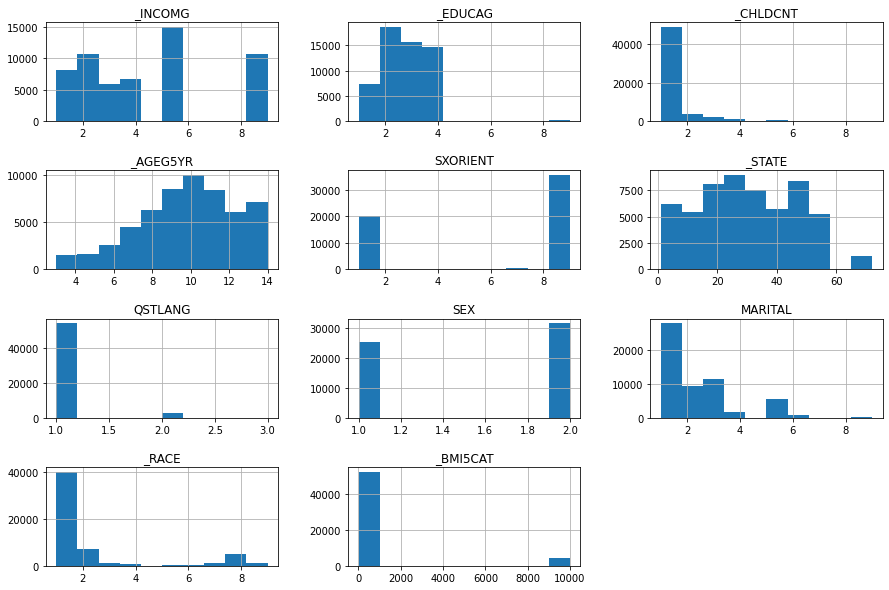

In [ ]:
#saving the target population
target_pop = df.loc[df['TYPE2']=='1']
demographics = ['_INCOMG','_EDUCAG','_CHLDCNT',	'_AGEG5YR',	'SXORIENT', '_STATE','QSTLANG',	'SEX','MARITAL','_RACE','_BMI5CAT']
d = target_pop[demographics]

#examine distribution of d 
d.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

In [ ]:
target_pop['_INCOMG'].value_counts(normalize=True)

5.0    0.263199
9.0    0.186244
2.0    0.186121
1.0    0.141538
4.0    0.118365
3.0    0.104532
Name: _INCOMG, dtype: float64

In [ ]:
target_pop['_EDUCAG'].value_counts(normalize=True)

2.0    0.329051
3.0    0.277437
4.0    0.258582
1.0    0.131018
9.0    0.003912
Name: _EDUCAG, dtype: float64

In [ ]:
target_pop['_CHLDCNT'].value_counts(normalize=True)

1.0    0.861740
2.0    0.067597
3.0    0.040213
4.0    0.016371
5.0    0.006009
9.0    0.004775
6.0    0.003295
Name: _CHLDCNT, dtype: float64

In [ ]:
target_pop['_AGEG5YR'].value_counts(normalize=True)

10.0    0.176165
9.0     0.150842
11.0    0.147864
13.0    0.116621
8.0     0.111863
12.0    0.107845
7.0     0.079457
6.0     0.045112
5.0     0.027895
4.0     0.017269
14.0    0.009903
3.0     0.009163
Name: _AGEG5YR, dtype: float64

In [ ]:
target_pop['SXORIENT'].value_counts(normalize=True)

9.0    0.627617
1.0    0.355131
7.0    0.006626
2.0    0.004670
3.0    0.004035
4.0    0.001921
Name: SXORIENT, dtype: float64

In [ ]:
target_pop['_STATE'].value_counts(normalize=True)

20.0    0.050240
48.0    0.039966
31.0    0.035931
24.0    0.032794
39.0    0.032759
45.0    0.032406
53.0    0.031349
27.0    0.028759
36.0    0.025798
21.0    0.025693
12.0    0.024512
9.0     0.024300
1.0     0.023719
34.0    0.023137
6.0     0.022503
8.0     0.021305
28.0    0.020336
29.0    0.020265
51.0    0.019824
40.0    0.019225
4.0     0.019190
72.0    0.019155
26.0    0.019032
23.0    0.018943
49.0    0.017745
47.0    0.017498
25.0    0.017287
5.0     0.016864
54.0    0.016811
35.0    0.016230
18.0    0.015419
46.0    0.015137
37.0    0.014943
33.0    0.014732
22.0    0.013992
19.0    0.013269
44.0    0.013234
13.0    0.013216
15.0    0.012670
42.0    0.012582
56.0    0.011948
55.0    0.011948
16.0    0.011912
17.0    0.011824
41.0    0.011648
30.0    0.011419
50.0    0.010890
10.0    0.010696
38.0    0.009956
11.0    0.009639
2.0     0.006097
32.0    0.005886
66.0    0.003366
Name: _STATE, dtype: float64

In [ ]:
target_pop['QSTLANG'].value_counts(normalize=True)

1.0    0.950959
2.0    0.049024
3.0    0.000018
Name: QSTLANG, dtype: float64

In [ ]:
target_pop['SEX'].value_counts(normalize=True)

2.0    0.55602
1.0    0.44398
Name: SEX, dtype: float64

In [ ]:
target_pop['MARITAL'].value_counts(normalize=True)

1.0    0.490149
3.0    0.202844
2.0    0.165310
5.0    0.096180
4.0    0.026327
6.0    0.014062
9.0    0.005128
Name: MARITAL, dtype: float64

In [ ]:
target_pop['_RACE'].value_counts(normalize=True)

1.0    0.706721
2.0    0.122524
8.0    0.088761
3.0    0.021957
7.0    0.018943
9.0    0.018309
4.0    0.015454
6.0    0.004353
5.0    0.002978
Name: _RACE, dtype: float64

In [ ]:
target_pop['_BMI5CAT'].value_counts(normalize=True)

4.0       0.487118
3.0       0.299041
2.0       0.129855
9999.0    0.078840
1.0       0.005146
Name: _BMI5CAT, dtype: float64

## **DEMOGRAPHICS**

**_INCOMG:** the response value 5 equates to an annual household income (from all sources). The response "$50,000 or more" represents the majority of the target population at 26.31%. This is the majority response of the total surveyed popultation as well.

**_EDUCAG:** the response value 2 equates to the level of education completed. The response "graduated high school" represents the majority of the surveyed population at 32.9%. This differs from the majority response of 4 for the total surveyed popultaion.

**_CHLDCNT:** the response value 1 equates to the number of children in the household. The response "None" represents the majority of the surveyed population at 86.17%. This is the majority response of the total surveyed popultation as well.

**_AGEG5YR:** the response value 10 equates to age range. The response "65 to 69" represents the majority of the surveyed population at 17.61%. This differs from the majority response of 9 for the total surveyed popultaion.

**SXORIENT:** the response value 9 equates to sexual orientation. The response "refused to answer" represents the majority of the surveyed population at 62.76%. This differs from the majority response of 1 for the total surveyed popultaion.

**_STATE:** the response value 20 equates to state of residence. The response "Kansas" represents the majority of the surveyed population at 5.02%. This is the majority response of the total surveyed popultation as well.

**QSTLANG:** the response value 1 equates to preferred language. The response "English" represents the majority of the surveyed population at 95.09%. This is the majority response of the total surveyed popultation as well.

**SEX:** the response value 2 equates to gender. The response "female" represents the majority of the surveyed population at 55.6%. The male gender accounts for the remaining 44.39%. This is the majority response of the total surveyed popultation as well.

**MARITAL:** the response value 1 equates to marital status. The response "married" represents the majority of the surveyed population at 49.01%. This is the majority response of the total surveyed popultation as well.

**_RACE:** the response value 1 equates to race/ethnicity. The response "White only, non-Hispanic" represents the majority of the surveyed population at 70.67%. This is the majority response of the total surveyed popultation as well.

**_BMI5CAT:** the response value 4 equates to Body Mass Index (BMI). The response categorized as "obese" represents the majority of the surveyed population at 48.71%. This differs from the majority response of 3 for the total surveyed popultaion.

# Save dataset (after manual feature selection)

We have successfully reduced the dimensionality of the dataset by manually filtering the variables from 330 to 144 variables and have created and identified the target variable `TYPE2`. Now, let's save these datasets and prepare for further feature reduction using machine learning.

In [ ]:
#read in data and save as variable df
df.to_csv('/content/drive/MyDrive/SPRINGBOARD/CAPSTONE 3/BRFSS Data/Interim/manualfs_2015.csv', index=False)

#save target population
target_pop.to_csv('/content/drive/MyDrive/SPRINGBOARD/CAPSTONE 3/BRFSS Data/Interim/target_pop_2015.csv', index=False)